In [1]:
from IPython.core.display import HTML
HTML(r"""<style> * { color: black !important; font-family: Calibri;  font-size: 20px !important; line-height: 1.5 !important; font-weight: 500; } </style> """)

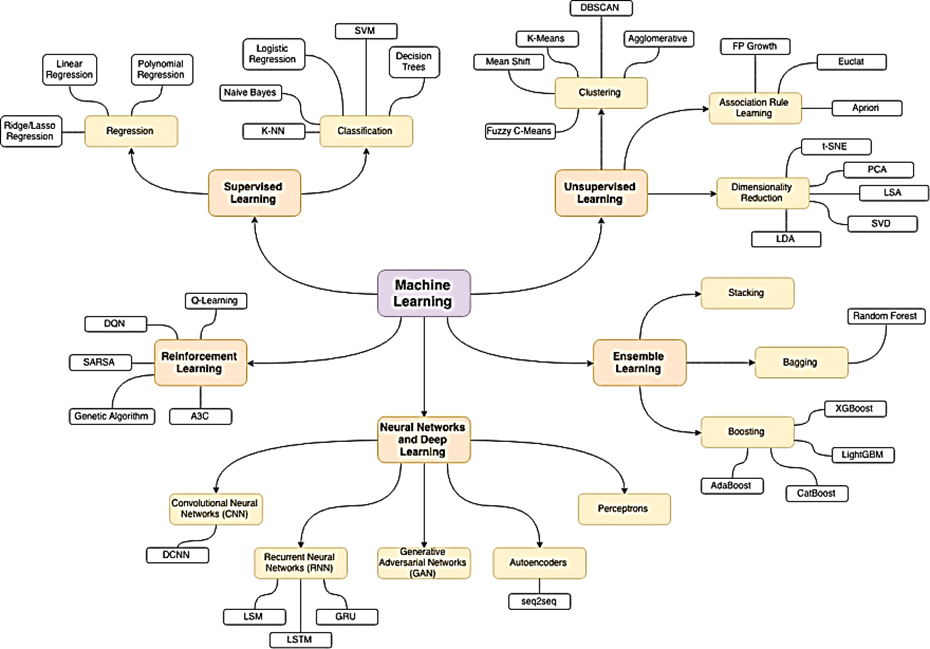

# **Logistic Regression**

## **Teorik Bilgi**

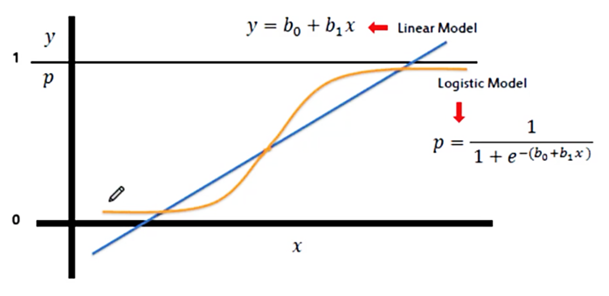 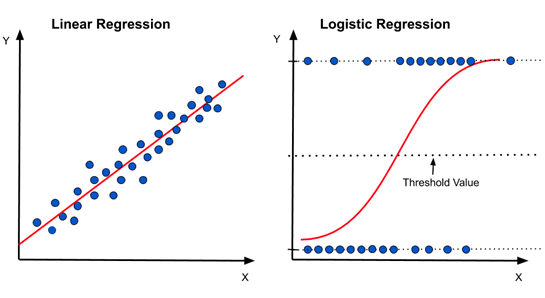

•	Linear regression bir eğri uydurma algoritmasıyken Logistic Regression bir binary (ikili) sınıflandırma algoritmasıdır, verilen kümeyi 2 sınıfa ayırır. (Çoklu sınıflandırma için multiple versiyonu da vardır.)<br>
•	Linear regressionun aksine logistic regression, verilen kümeyi belirli bir threshold değerine göre ikiye ayırır.
Bu sınır değerinin üstünde kalanlar bir küme, altında kalanlar ise diğer kümeyi oluşturur.<br>

### **Notasyonlar**<br>

##### **Birinci Notasyon**<br>

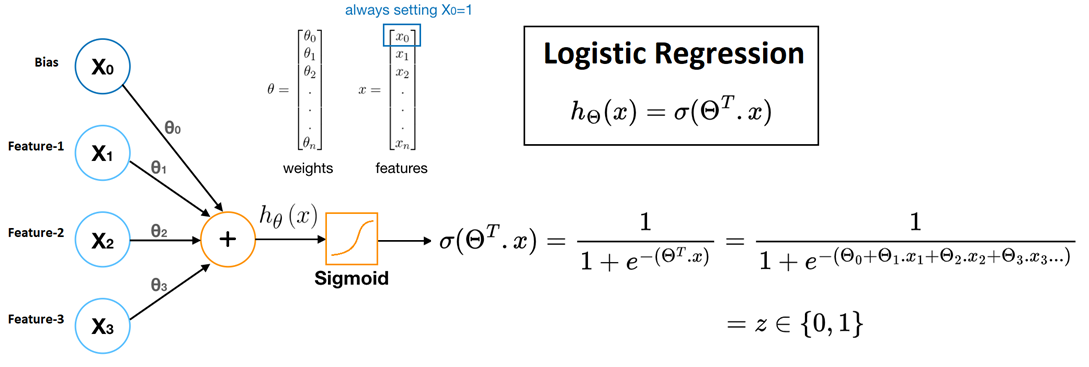

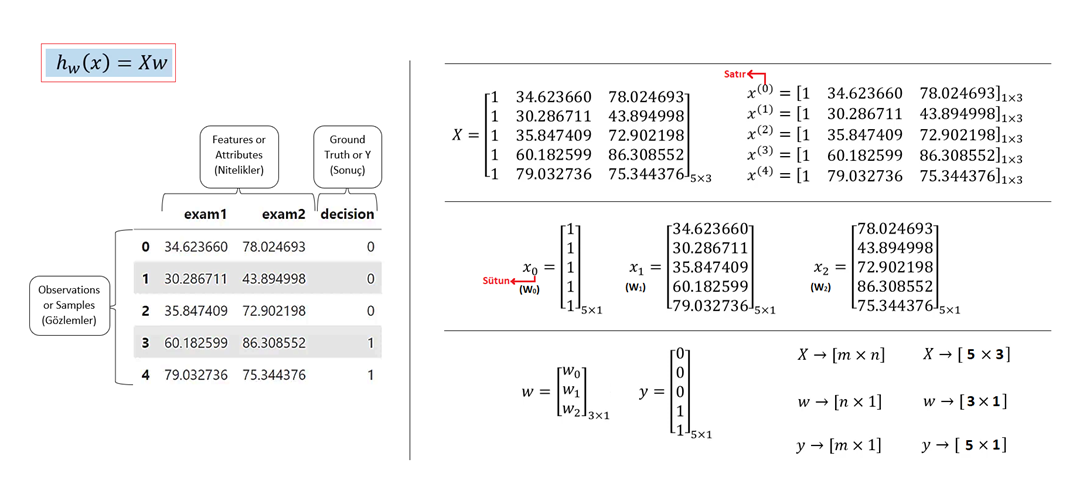

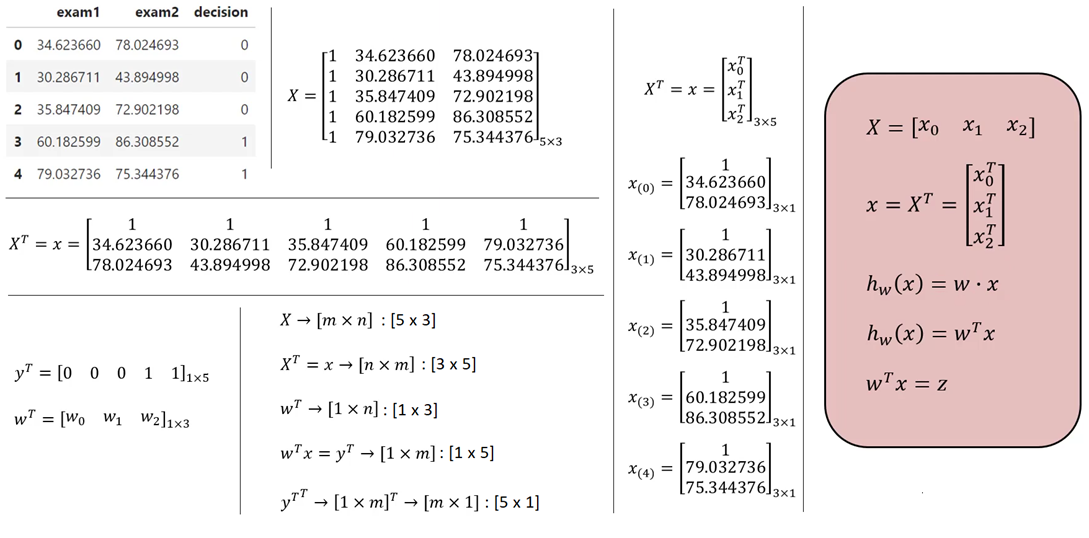

##### **Örnek Gösterim**<br>

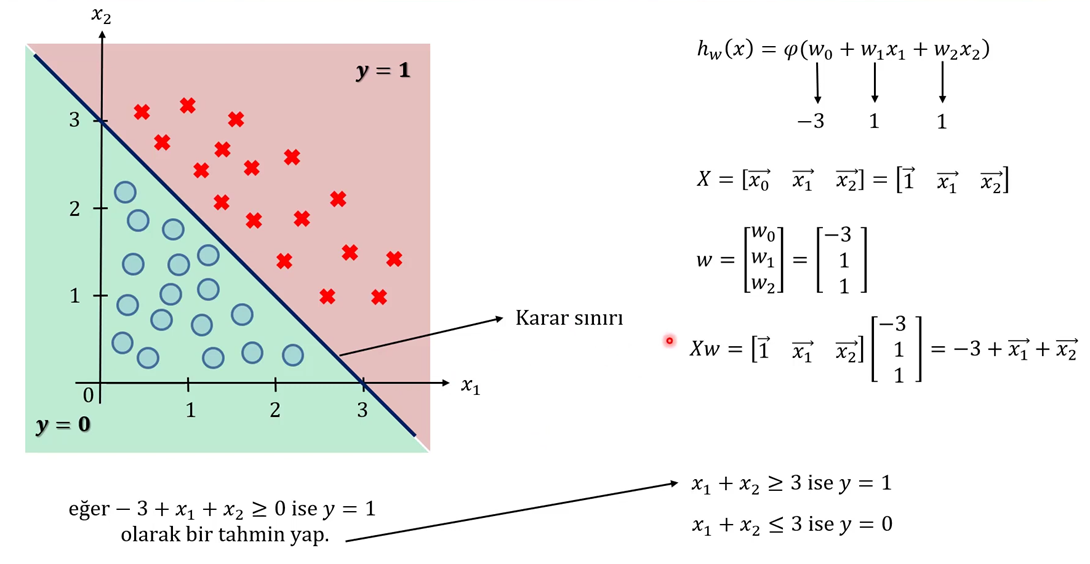

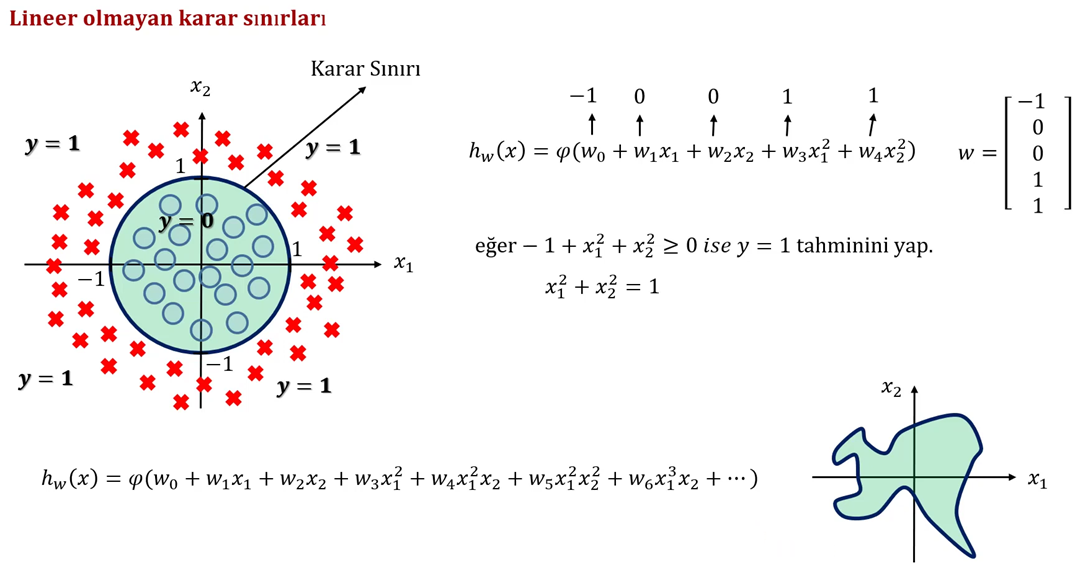

##### **İkinci Notasyon**<br>

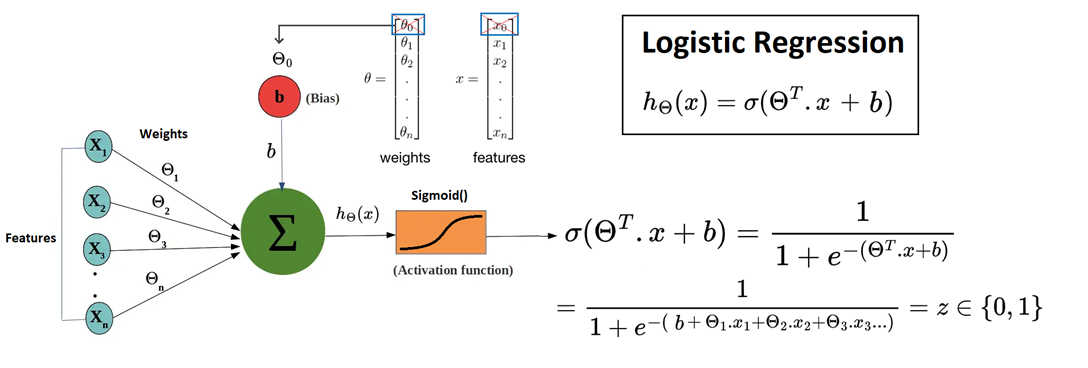

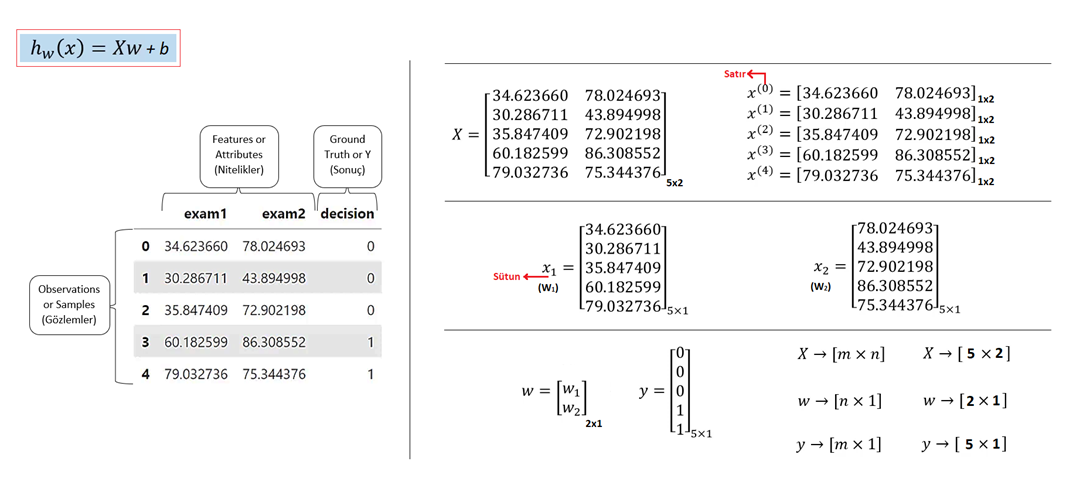

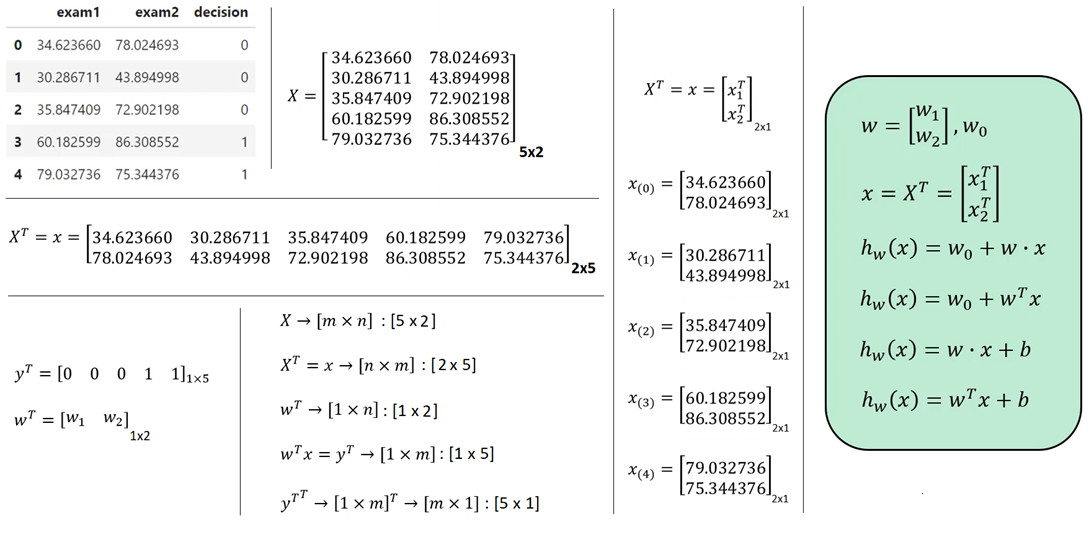

### **İşlem Adımları**<br>

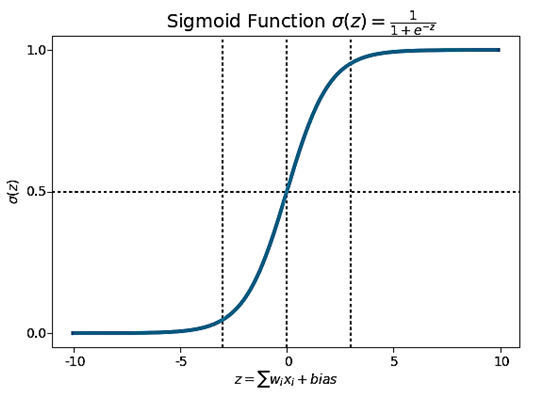

•	Logistic regression başlangıçta multiple linear regression ile aynıdır.<br>
•	Tahmin edilen regression denkleminin sonucu (h(x)) sigmoid fonksiyonuna verilerek 0-1 arası olasılıksal bir çıktı elde edilir.<br>
•	Her bir örnek için elde edilen çıktı değerleri ile yine 0-1 arası seçilen bir sınır değeri karşılaştırılır.<br>
•	Sınır değerinden küçük örnekler bir grup, sınırdan büyük örnekler diğer bir grup olmak üzere ikili sınıflandırma yapılır.<br>


### **Log Hata Fonksiyonu**

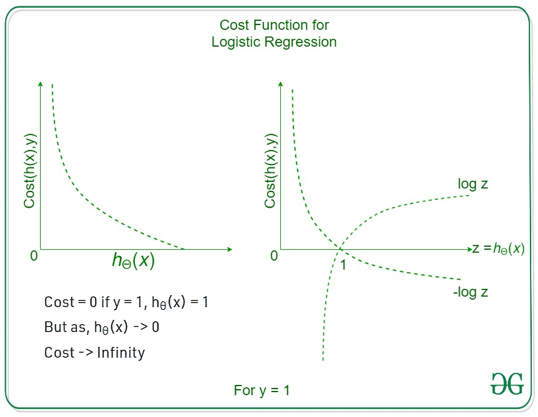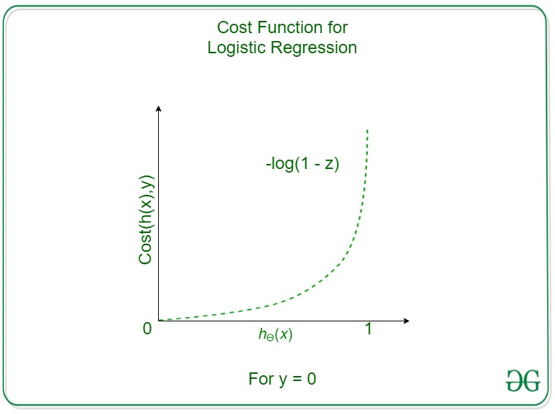

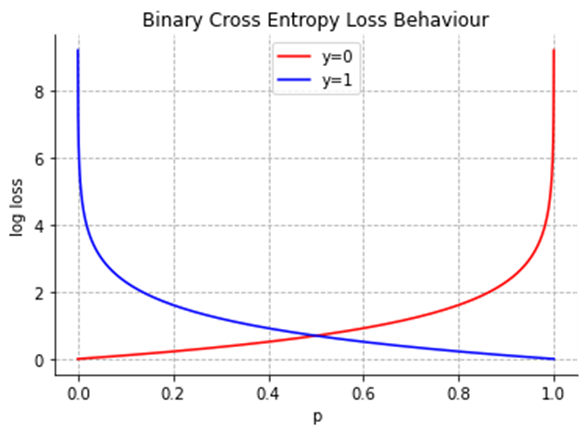

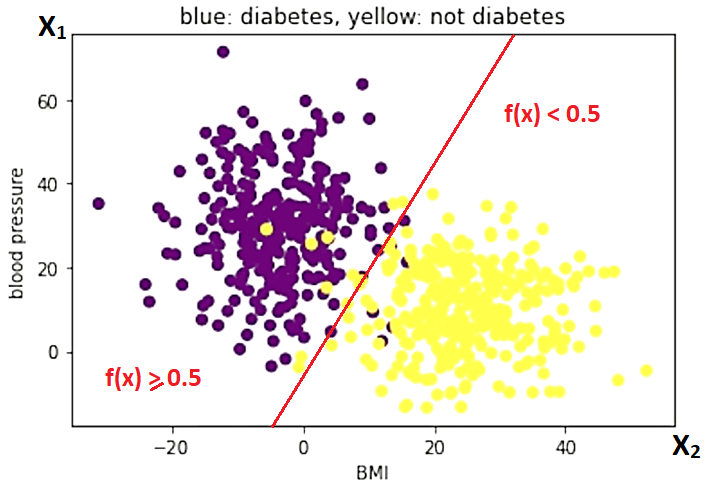

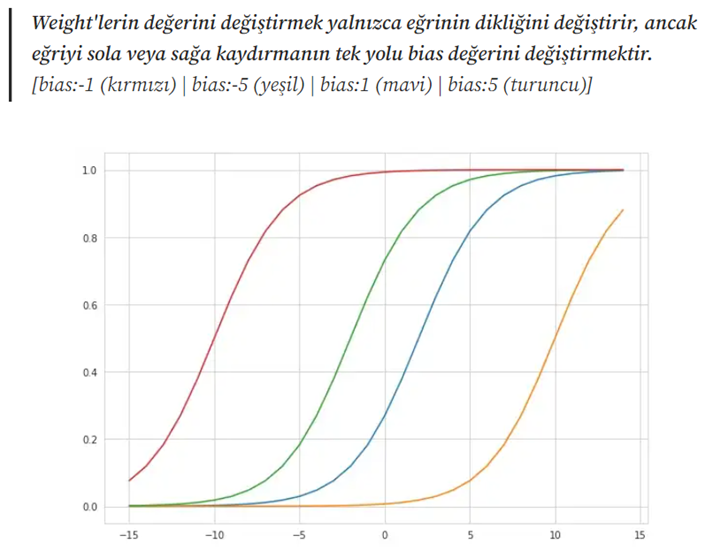

## **Uygulama**

In [430]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### **Numpy reshape() Fonksiyonu**

In [526]:
X = np.array([11, 22, 33, 44, 55, 66, 77, 88, 99, 100])

In [527]:
X.ndim, X.shape
# Yani X, 1 boyutlu ve 20 elemanlı bir satır matrisi, hiç sütunu yok.
# X matrisi ile işlemler yapılabilimesi için onu satır-sütun matrisine çevirmemiz gerekmekte.

(1, (10,))

In [528]:
X = X.reshape(1, -1)
X.ndim, X.shape
# reshape(1, -1) demek; 1 satır olsun ve tüm elemanlar o satıra yerleşsin.
# Ayrıca satır + sütun olarak dimension 2'ye çıkmış olur.

(2, (1, 10))

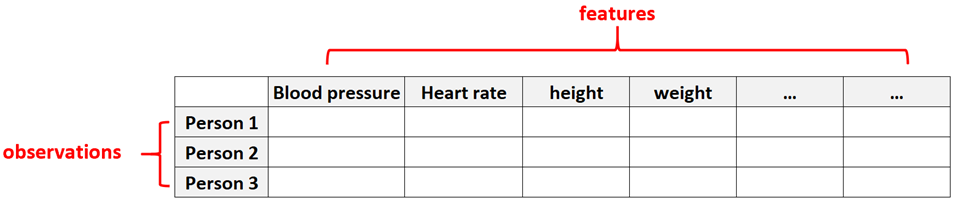

• Veri setinde Feature: veriye ait benzersiz nitelik türü; Observation (Gözlem) ise: bu niteliklerin değerlerine sahip her bir örnek anlamına gelir.

In [536]:
pm(X)

[O]: Observation [F]: Feature


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
O1,11,22,33,44,55,66,77,88,99,100


In [537]:
X = X.reshape(2, -1)
X.ndim, X.shape
# reshape(2, -1) demek; 2 satır olsun ve tüm elemanlar 2 satıra bölünsün.

(2, (2, 5))

In [538]:
pm(X)

[O]: Observation [F]: Feature


,F1,F2,F3,F4,F5
O1,11,22,33,44,55
O2,66,77,88,99,100


In [539]:
X = X.reshape(-1, 2)
X.ndim, X.shape
# reshape(-1, 1) demek; 2 sütun olsun ve tüm elemanlar 2 sütuna bölünsün.

(2, (5, 2))

In [540]:
pm(X)

[O]: Observation [F]: Feature


,F1,F2
O1,11,22
O2,33,44
O3,55,66
O4,77,88
O5,99,100


In [541]:
X = X.reshape(-1, 1)
X.ndim, X.shape
# reshape(-1, 1) demek; 1 sütun olsun ve tüm elemanlar 1 sütuna yerleşsin.
# X'in 20 satır 1 sütun olmasını istiyoruz.

(2, (10, 1))

In [542]:
pm(X)

[O]: Observation [F]: Feature


,F1
O1,11
O2,22
O3,33
O4,44
O5,55
O6,66
O7,77
O8,88
O9,99
O10,100


In [543]:
X.shape[0], X.shape[1]

(10, 1)

#### **Obesity Dataset**

In [556]:
data = {
    'Gender': [1,1,0,0,1,1,1,1,1,0,1,0,0,1,1,0,0,1,1,1,1,0,0,1,0,0,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1,1,0,0,1,1,1,0,1,1,0,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,1,0,0,1,1,1,0,1,0,0,0,0,0,1,1,0,1,1,1,0,1,1,1,0,0,1,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,1,1,1,0,1,0,0,0,1,1,1,1,0,1,1,1,0,0,1,1,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,1,0,1,0,0,0,0,1,1,1,1,0,0,1,1,1,0,0,1,1,0,0,1,1,1,1,0,1,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,1,0,1,1,1,1,1,1,0,1,0,0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,1,1,1,0,1,1,0,0,1,1,0,0,1,0,1,0,0,1,0,1,1,1,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,1],
    'Height': [174,189,185,195,149,189,147,154,174,169,195,159,192,155,191,153,157,140,144,172,157,153,169,185,172,151,190,187,163,179,153,178,195,160,157,189,197,144,171,185,175,149,157,161,182,185,188,181,161,140,168,176,163,172,196,187,172,178,164,143,191,141,193,190,175,179,172,168,164,194,153,178,141,180,185,197,165,168,176,181,164,166,190,186,168,198,175,145,159,185,178,183,194,177,197,170,142,160,195,190,199,154,161,198,192,195,166,159,181,149,150,146,190,192,177,148,165,146,144,176,168,187,187,184,158,158,194,145,182,154,168,187,158,167,171,183,190,194,171,159,169,167,180,163,140,197,194,140,195,168,196,140,150,168,155,179,182,168,187,181,199,184,192,182,172,181,176,156,151,188,187,174,167,196,197,185,170,181,166,188,162,177,162,180,192,165,167,182,161,158,141,154,165,142,141,145,157,177,166,193,184,179,156,182,145,150,145,196,191,148,150,148,153,196,185,171,143,142,141,159,173,183,152,178,188,155,166,188,171,179,186,153,184,177,145,170,181,165,174,146,178,166,191,177,183,151,182,142,188,161,153,140,169,162,183,162,172,150,169,184,159,163,156,157,147,141,173,154,168,168,145,152,187,163,178,187,179,190,172,188,193,147,147,166,192,181,150,178,156,149,156,183,162,165,168,160,169,140,187,151,186,182,188,179,156,188,183,144,196,171,171,180,191,179,180,154,188,142,170,152,190,181,153,187,144,148,199,167,164,185,164,142,165,172,157,155,167,164,189,161,155,171,154,179,170,184,191,162,178,157,184,197,160,184,190,174,189,186,180,186,193,161,151,195,184,141,185,186,142,147,151,160,185,163,174,150,142,178,154,176,159,191,177,151,182,197,146,160,157,150,167,180,183,183,152,164,187,169,149,163,195,174,182,169,193,148,186,165,146,166,179,177,181,161,157,169,152,162,162,177,195,140,186,178,174,180,188,187,153,165,178,163,150,179,165,168,153,184,188,166,172,182,143,152,186,159,146,176,146,159,162,172,169,182,183,176,188,175,154,184,179,152,179,145,181,158,188,145,161,198,147,154,178,195,167,183,164,167,151,147,155,172,142,146,188,173,160,187,198,179,164,146,198,170,152,150,184,141,150,173],
    'Weight': [96,87,110,104,61,104,92,111,90,103,81,80,101,51,79,107,110,129,145,139,110,149,97,139,67,64,95,62,159,152,121,52,65,131,153,132,114,80,152,81,120,108,56,118,126,76,122,111,72,152,135,54,110,105,116,89,92,127,70,88,54,143,54,83,135,158,96,59,82,136,51,117,80,75,100,154,104,90,122,51,75,140,105,118,123,50,141,117,104,140,154,96,111,61,119,156,69,139,69,50,156,105,155,145,140,126,160,154,106,66,70,157,135,90,96,60,57,104,108,156,87,122,138,160,149,96,115,79,151,54,139,70,153,110,155,150,156,108,147,124,54,85,149,123,79,125,106,146,98,115,50,52,60,140,111,103,84,160,102,105,99,76,101,143,111,78,109,106,67,80,136,138,151,131,149,119,102,94,126,100,74,117,97,73,108,80,135,84,134,95,85,100,105,137,94,108,74,117,144,151,57,93,89,104,160,87,99,122,96,67,84,155,146,159,52,131,118,86,126,109,82,138,90,140,54,144,70,123,120,130,137,78,86,81,78,81,141,155,65,110,85,61,62,155,50,114,98,159,90,89,70,143,141,159,147,58,109,119,145,132,104,131,137,52,84,86,139,145,148,50,130,103,121,57,83,94,114,80,75,57,65,126,94,107,139,139,74,160,52,100,74,105,68,83,143,156,88,76,92,82,140,108,81,110,126,114,153,88,69,141,147,156,146,67,60,132,99,135,95,141,118,111,104,140,66,54,92,85,71,102,160,71,68,62,56,57,153,126,125,145,71,118,92,83,115,106,68,58,138,60,83,88,51,153,50,90,124,143,58,148,61,103,158,147,152,80,94,127,131,67,62,124,60,63,95,144,91,142,96,87,120,62,117,154,149,72,138,83,66,50,58,70,76,87,154,71,96,136,61,137,104,107,70,110,130,141,68,143,123,133,56,101,154,154,103,98,114,64,130,61,61,146,146,107,54,59,141,130,77,95,79,154,97,127,62,158,133,157,65,153,116,73,149,146,128,140,70,121,101,145,157,90,121,50,79,77,128,83,81,147,123,132,56,141,80,127,99,142,115,109,142,112,65,153,79,131,142,64,55,107,115,108,86,85,115,111,109,80,136,150,59,147,50,53,98,153,121,136,95,131],
    'Obesity':[1,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,1,0,1,1,0,1,0,1,0,0,1,1,1,0,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,1,1,0,1,1,1,1,1,0,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0,1,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,1,1,0,1,1,0,0,1,1,1,1,1,1,1,0,1,0,0,1,1,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,0,1,1,1,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,0,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,1,0,0,1,1,0,0,0,0,1,1,1,1,0,1,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,1,1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,1,0,1,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1,0,1,0,0,1,1,1,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,1,1,1,1,0,1,0,1,0,1,1,0,1,1,0,1,0,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1,0,1,0,0,1,1,1,1,1,1]
    }
    
df = pd.DataFrame(data)
X = np.array(df[['Gender', 'Height', 'Weight']])
y = np.array(df['Obesity']).reshape(-1, 1)

In [557]:
display(df)

,Gender,Height,Weight,Obesity
0,1,174,96,1
1,1,189,87,0
2,0,185,110,1
3,0,195,104,0
4,1,149,61,0
...,...,...,...,...
495,0,150,153,1
496,0,184,121,1
497,0,141,136,1
498,1,150,95,1


In [552]:
a = 0.001
epoch = 1000
n = X.shape[0]  # observation (gözlem) sayısı, 500 burada.
f = X.shape[1]  # fature sayısı, 3 burada: gender, height, weight.
b = 0.1  # bias değeri
J = []  # hata değerleri

In [563]:
# Weights: Her feature'a ait ağırlık değeri.
# Örneğin Gender * w1, Height * w2, Weight * w3 şeklinde.
# Her bir feature'ın sonuca (y) ne oranda etki ettiğini belirten sayısal ağırlıklar.
w = np.ones(f).reshape(-1, 1)

In [567]:
# y1 = b0 + b1.Gender1 + b2.Height1 + b3.Weight1
# y2 = b0 + b1.Gender2 + b2.Height2 + b3.Weight2 
# y3 = b0 + b1.Gender3 + b2.Height3 + b3.Weight3 
# Her bir feature için bir ağırlık değeri olmalıdır.
X.shape, y.shape, w.shape

((500, 3), (500, 1), (3, 1))

In [592]:
for i in range(epoch):
    # forward propagation    # z = X * w + b 
    z = X @ w + b            # X:(500,3) * w:(3,1) * => z:(500,1)
    # sigmoid
    p = 1 / (1 + np.exp(-z)) # p:(500,1)

    # backward propagation
    dw = (1 / n) * np.dot(X.T, (p - y)) # X.T:(3,500) p-y:(500,1) => dw:(3,1)
    db = (1 / n) * np.sum(p - y)        # np.sum(p - y):(500,1)

    # gradient descent
    w = w - a * dw
    b = b - a * db

    # binary cross entropy loss / log loss
    Jw = -1 / n * (y * np.log(p) + (1 - y) * np.log(1 - p))

print("sum_J(w): ", np.sum(Jw))

sum_J(w):  0.15975338126921274


In [511]:
def predict(X_test):
    z = X_test @ w + b
    p = 1 / (1 + np.exp(-z))
    return 1 * (p > 0.5)

In [523]:
predict([1,176,85])

array([0])

In [524]:
w

array([[ 0.98535211],
       [-0.10958557],
       [ 0.20040394]])